In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

## Обработаем таблицу

In [2]:
df = pd.read_csv(os.path.join('EUR_RUB__TOM.csv'), sep = ';')

In [3]:
df.drop(['<TICKER>', '<PER>', '<TIME>', '<VOL>'], axis = 1, inplace = True)

In [4]:
df = df.rename(columns = {'<DATE>':'dDate', '<CLOSE>':'nPr'})

In [5]:
df.dDate = pd.to_datetime(df['dDate'], format='%Y%m%d')
#df['dDate'] = pd.to_datetime(df['dDate']).dt.date.astype('datetime64[ns]')

In [6]:
df = df[:(len(df)-1)]

In [7]:
df.set_index(['dDate'], inplace = True)

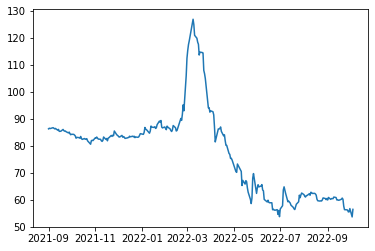

In [8]:
plt.plot(df)
plt.show()

In [9]:
df.tail()

,nPr
dDate,
2022-09-28,55.475
2022-09-29,55.470
2022-09-30,56.700
2022-10-03,53.600
2022-10-04,56.400


## Сгенерим фичи

In [10]:
def add_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    #df['is_wknd'] = df.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        df[f'lag_{lag}'] = df['nPr'].shift(lag)

    df['y_mean'] = df['nPr'].shift().rolling(rolling_mean_size).mean().copy()

In [11]:
add_features(df, 40, 3)

In [12]:
df.dropna(inplace = True)

In [13]:
df

,nPr,year,month,day,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40,y_mean
dDate,,,,,,,,,,,,,,,,,,,,,
2021-10-27,81.925,2021,10,27,2,80.600,80.9025,81.8700,82.6550,82.5125,...,85.8000,86.4500,86.3000,86.4950,86.7350,86.6600,86.4000,86.5300,86.3000,81.124167
2021-10-28,82.050,2021,10,28,3,81.925,80.6000,80.9025,81.8700,82.6550,...,86.1050,85.8000,86.4500,86.3000,86.4950,86.7350,86.6600,86.4000,86.5300,81.142500
2021-10-29,81.920,2021,10,29,4,82.050,81.9250,80.6000,80.9025,81.8700,...,85.3700,86.1050,85.8000,86.4500,86.3000,86.4950,86.7350,86.6600,86.4000,81.525000
2021-11-01,82.930,2021,11,1,0,81.920,82.0500,81.9250,80.6000,80.9025,...,85.4000,85.3700,86.1050,85.8000,86.4500,86.3000,86.4950,86.7350,86.6600,81.965000
2021-11-02,82.800,2021,11,2,1,82.930,81.9200,82.0500,81.9250,80.6000,...,85.4100,85.4000,85.3700,86.1050,85.8000,86.4500,86.3000,86.4950,86.7350,82.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,55.475,2022,9,28,2,56.150,56.2400,56.3000,57.6175,60.1500,...,62.3500,62.3100,62.6125,62.7525,61.6425,62.2000,61.5400,61.5000,60.9800,56.230000
2022-09-29,55.470,2022,9,29,3,55.475,56.1500,56.2400,56.3000,57.6175,...,62.1175,62.3500,62.3100,62.6125,62.7525,61.6425,62.2000,61.5400,61.5000,55.955000
2022-09-30,56.700,2022,9,30,4,55.470,55.4750,56.1500,56.2400,56.3000,...,61.6650,62.1175,62.3500,62.3100,62.6125,62.7525,61.6425,62.2000,61.5400,55.698333


## Обучим модель

In [14]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('nPr', axis = 1), df.nPr, 
                                                   shuffle = False, test_size = 0.2, random_state = 35)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

array([61.26249668, 63.40312168, 61.23905918, 61.87187168, 61.15702793,
       61.78984043, 59.67265293, 62.56327793, 62.22343418, 64.77030918,
       64.02421543, 61.51249668, 61.46952793, 59.11796543, 61.78593418,
       59.07890293, 60.93827793, 58.23515293, 59.28593418, 58.48124668,
       59.60624668, 60.37577793, 60.28593418, 60.48124668, 60.85234043,
       59.95780918, 60.11796543, 59.62187168, 60.06718418, 59.88359043,
       59.96171543, 60.68827793, 60.00077793, 60.20390293, 59.45780918,
       59.44609043, 59.12187168, 59.54374668, 60.41874668, 59.44999668,
       56.97343418, 54.87968418, 55.59062168, 54.66093418, 55.11015293,
       55.57499668, 56.09452793, 52.16093418])

In [16]:
print(f'Ошибка на тестовой выборке: {round(mean_absolute_error(y_train, lr.predict(X_train)),2)}')
print(f'Ошибка на тренировочной выборке: {round(mean_absolute_error(y_test, lr.predict(X_test)),2)}')

Ошибка на тестовой выборке: 1.21
Ошибка на тренировочной выборке: 0.95


## Спрогнозируем курс евро на 5 октября

In [17]:
predict = df.nPr.reset_index().copy()

In [18]:
predict

,dDate,nPr
0,2021-10-27,81.925
1,2021-10-28,82.050
2,2021-10-29,81.920
3,2021-11-01,82.930
4,2021-11-02,82.800
...,...,...
231,2022-09-28,55.475
232,2022-09-29,55.470
233,2022-09-30,56.700
234,2022-10-03,53.600


In [19]:
predict.loc[236] = ''

In [20]:
predict.loc[236].dDate = pd.to_datetime('2022-10-05')
predict.loc[236].nPr = 0

In [21]:
predict.dDate = pd.to_datetime(predict.dDate)

In [22]:
predict.set_index('dDate', inplace = True)

In [23]:
predict.tail()

,nPr
dDate,
2022-09-29,55.47
2022-09-30,56.7
2022-10-03,53.6
2022-10-04,56.4
2022-10-05,0


In [24]:
add_features(predict, 40, 3)

In [25]:
a = predict.drop('nPr', axis = 1).tail(1).copy()

In [26]:
print('Предсказанный курс евро на 5 октября - ', round(lr.predict(a)[0], 4))

Предсказанный курс евро на 5 октября -  56.6531


In [27]:
gb = GradientBoostingRegressor()
gb.fit(df.drop('nPr',axis=1),df.nPr)
print('Предсказанный курс евро на 5 октября - ', round(gb.predict(a)[0],4))

Предсказанный курс евро на 5 октября -  54.9225
